Same code from assigment- used strictly for test case

In [1]:
from random import choice as random_choice, random
import math
import copy 

# Data structure for sudoku board. 
# See documentation above.
class SudokuBoard:
    # Constructor: prefills is a dictionary describing the initial problem. See writeup above.
    # The argument compute_allowed_fills is used for test cases. 
    def __init__(self, prefills, compute_allowed_entries=True, verbose=False):
        # save prefills in a field.
        self.prefills = prefills
        # Initialize the dictionary for allowed entries.
        self.allowed_entries = {}
        if compute_allowed_entries:
            # Place each entry in prefills into the allowed_entries as a singleton list.
            for (coord,val) in prefills.items():
                self.allowed_entries[coord] = [val]
            # iterate through all cells
            for i in range(1, 10):
                for j in range(1, 10):
                    if (i,j) not in self.allowed_entries:
                        # Compute list of allowed entry for cell
                        self.compute_allowed_entries_for_cell( i, j)
            self.state = {}
            # Initialize self.state to a random state.
            self.initialize_state(verbose)
        else: 
            self.state = self.prefills
        
    # Method: pretty_print
    # Print the problem nicely in a human readable format.
    def pretty_print(self):
        state = self.state
        # Iterate through each row
        blk_sep = '|' + '-'*9 + '+' + '-'*9 +  '+' +  '-'*9  + '|'
        print(blk_sep)
        for row_id in range(1,10): 
            # Iterate through each column
            row_str = '|'
            for col_id in range(1,10):
                # If row is not empty
                if (row_id, col_id) in state:
                    row_str = row_str + ' '+str(state[(row_id, col_id)]) + ' '
                else:
                    row_str = row_str + '   '
                if col_id % 3 == 0:
                    row_str = row_str + '|'
            print(row_str)
            if row_id %3 == 0:
                print(blk_sep)

    # get the list of prefills for a row i
    def get_row_prefills(self, i):
        return [ self.prefills[(i, j )] for j in range(1, 10) if (i,j) in self.prefills ]

    # get the list of prefills for a column j
    def get_col_prefills(self, j):
        return [ self.prefills[(i, j )] for i in range(1, 10) if (i,j) in self.prefills ]

    # get the list of prefills for block corr. to (i,j)
    def get_blk_prefills(self, i, j):
        # first compute the block coords from (i,j)
        (a, b) = ((i-1)//3 + 1, (j-1)//3 + 1)
        # find the prefills in this block.
        return [ self.prefills[(j,k)] 
                    for j in range(a*3-2, a*3+1)
                    for k in range(b*3-2, b*3+1)
                    if (j,k) in self.prefills ]

    # Compute the list of allowed entries for cell (i,j) that do not already
    # repeat a prefill for the row i, col j or blk corr. to (i,j)
    def compute_allowed_entries_for_cell(self, i, j):
        assert ( 1 <= i <= 9)
        assert ( 1 <= j <= 9)
        # Get the prefills in row i, column j and blk corr. to (i,j)
        lst = self.get_row_prefills(i) + self.get_col_prefills(j) + self.get_blk_prefills(i, j)
        # Get the numbers from 1 to 9 that are NOT in the list of prefills computed above.
        allowed_lst = [ k for k in range(1, 10) if k not in lst]
        # Set the dictionary entry in self.allowed_entries
        self.allowed_entries[(i,j)] = allowed_lst
        # make sure that allowed_lst is not empty. This would mean a bad problem with no solutions.
        assert len(allowed_lst) >= 1, 'Conflict detected in cell (%d, %d) -- check your sudoku problem please' %(i,j)
        return 


    # Initialize the state of the board to a random state.
    def initialize_state(self, verbose=False):
        self.state = {}
        # Prefill the items 
        for (coord, k) in self.prefills.items():
            self.state[coord] = k
        # randdomly choose from the allowed entries
        for i in range(1, 10):
            for j in range(1, 10):
                if (i, j) not in self.state:
                    assert (i,j) in self.allowed_entries
                    lst = self.allowed_entries[(i,j)]
                    k  = random_choice(lst)
                    if verbose:
                        print('board.state[(%d,%d)] = %d' % (i,j,k))
                    self.state[(i,j)] = k
        return 
    
    # TODO: Implement this function
    # Compute a fitness score for this board with self.state representing the board state.
    # Important: 
    #   1. Fitness score must be <= 0
    #   2. Fitness score = 0 means problem is successfully solved.
    #   3. Lower fitness score means solution violates Sudoku property for more rows, columns and blocks.
    # You should use the description of fitness provided as part of the problem writeup.
    # You can use verbose flag to print messages by checking if verbose is True.
    # This is enabled during test cases below.
    def compute_fitness_score(self, verbose=False):
        
        # YOUR CODE HERE
        #raise NotImplementedError()
        overAll_fitness = 0
        # for each row
        for i in range(1,10):
            row =[]
            for j in range(1,10):
                row.append(self.state[(i,j)])
            
            row_set = set(row)
            uniqueNums = len(row_set)
            rowFitness = uniqueNums - 9
            if verbose:
                #print(row)
                #print("unique Nums: "+str(uniqueNums))
                print("Fitness for row "+str(i)+" : "+str(rowFitness))
                #print("...............................................")
            #update overall fitness
            overAll_fitness += rowFitness
        if verbose:
            print("Current overAll Fitness: "+str(overAll_fitness))
            
            
            
        #for each column
        for i in range(1,10):
            col =[]
            for j in range(1,10):
                col.append(self.state[(j,i)])
            
            col_set = set(col)
            uniqueNums = len(col_set)
            colFitness = uniqueNums - 9
            if verbose:
                #print(col)
                #print("unique Nums: "+str(uniqueNums))
                print("Fitness for Col "+str(i)+" : "+str(colFitness))
                #print("...............................................")
            #update overall fitness
            overAll_fitness += colFitness
        if verbose:
            print("Current overAll Fitness: "+str(overAll_fitness))
            
        #for each block
        for i in range(1,10,3):
            
            for j in range(1,10,3):
                #print(i,j)
                block =[]
                
                block.append(self.state[(i,j)])
                block.append(self.state[(i,j+1)])
                block.append(self.state[(i,j+2)])
                
                block.append(self.state[(i+1,j)])
                block.append(self.state[(i+1,j+1)])
                block.append(self.state[(i+1,j+2)])
                
                block.append(self.state[(i+2,j)])
                block.append(self.state[(i+2,j+1)])
                block.append(self.state[(i+2,j+2)])
                block_set = set(block)
                uniqueNums = len(block_set)
                blockFitness = uniqueNums - 9
                if verbose:
                    #print(block)
                    #print("unique Nums: "+str(uniqueNums))
                    print("Fitness for Block "+str(i)+" : "+str(blockFitness))
                    #print("...............................................")
                #update overall fitness
                overAll_fitness += blockFitness
        if verbose:
            print("Current overAll Fitness: "+str(overAll_fitness))    
            
            
            
            
            
            
            
            
        #return overall fitness score
        return overAll_fitness
    #Function: make_copy
    # make a shallow copy of the all fieldsd but a deep copy of the state so that it can be modified
    # modify the state to set entry (i,j) to k
    def make_copy(self, i, j, k):
        copy_state = copy.copy(self)
        copy_state.state= copy.deepcopy(self.state) # deep copy
        assert k in self.allowed_entries[(i,j)]
        assert self.state[(i,j)] != k
        copy_state.state[(i,j)] = k
        return copy_state
    
    #Function: get_all_neighbors
    # Get all sudoku states that differ from current state in one position.
    # Note that all cells have to be filled with some entry from self.allowed_entries
    def get_all_neighbors(self):
        lst = [ self.make_copy(i, j, l) 
               for i in range(1,10)
                   for j in range(1,10)
                       for l in self.allowed_entries[(i,j)] 
                           if (l != self.state[(i,j)]) ]
        # lst_with_fitness= [( neighbor.compute_fitness_score(), neighbor) for neighbor in lst ]
        return lst

In [2]:
def read_sudoku_problem(filename, compute_allowed_fills=True, verbose=False):
    prefills = {}
    with open(filename, 'r') as file:
        row_id = 1
        for rows in file:
            rows = rows.strip()
            cont_list = [char for char in rows]
            for (col_id, row_contents) in enumerate(cont_list):
                row_contents = row_contents.strip()
                if '1' <= row_contents <= '9':
                    prefills[(row_id, col_id+1)] = int(row_contents)
            row_id = row_id + 1
        file.close()
    return SudokuBoard(prefills, compute_allowed_fills, verbose)

In [3]:
import random

In [4]:
def simulated_annealing_single_step(current_state, current_temperature):
    neighbors = current_state.get_all_neighbors()
    randNeighbor = random.choice(neighbors)
    origFitScore = current_state.compute_fitness_score()
    newFitScore = randNeighbor.compute_fitness_score()
    diff = newFitScore - origFitScore
    if (diff >= 0):
        return randNeighbor
    else:
        r = math.exp(diff/current_temperature)
        u = random.random()
        if (u<= r):
            return randNeighbor
        else:
            return current_state

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

def run_simulated_annealing(initial_state, initial_temperature=20, num_trials=2000, cooling_schedule=(100,0.4)):
    fitness_lst = [initial_state.compute_fitness_score()]
    current_state = initial_state
    n_iters, cooling_frac = cooling_schedule
    current_temperature = initial_temperature
    best_fitness = - float('inf')
    best_state = None
    for j in range(num_trials):
        if j > 0 and j % n_iters == 0:
            current_temperature = cooling_frac * current_temperature
            print('@Iter %d cooling to %f' % (j, current_temperature))
        current_state = simulated_annealing_single_step(current_state, current_temperature)
        current_fitness = current_state.compute_fitness_score()
        fitness_lst.append( current_fitness)
        if current_fitness > best_fitness:
            print('@Iter %d - Best so far: %f' % (j,current_fitness))
            best_fitness = current_fitness
            best_state = current_state
            if best_fitness >= 0.0:
                print('SOLVED!!')
                best_state.pretty_print()
    plt.plot(range(len(fitness_lst)), fitness_lst)
    plt.xlabel('Iteration Number')
    plt.ylabel('Fitness Values')
    best_state.pretty_print()
    return best_state
    

**5 easy sudoku problems**

http://lipas.uwasa.fi/~timan/sudoku/
 -from the sudokus.zip file

|---------+---------+---------|
| 8  4  3 | 6  3  3 | 1  7  9 |
| 1  3  2 | 3  3  8 | 6  5  4 |
| 1  9  6 | 9  4  5 | 3  2  8 |
|---------+---------+---------|
| 2  8  3 | 5  7  4 | 9  1  2 |
| 4  5  4 | 2  9  2 | 6  3  7 |
| 2  1  9 | 3  6  3 | 5  4  5 |
|---------+---------+---------|
| 3  6  1 | 4  5  2 | 7  9  5 |
| 5  7  4 | 1  8  3 | 2  9  3 |
| 9  2  8 | 7  5  3 | 3  6  5 |
|---------+---------+---------|
@Iter 0 - Best so far: -43.000000
@Iter 6 - Best so far: -42.000000
@Iter 11 - Best so far: -41.000000
@Iter 12 - Best so far: -40.000000
@Iter 13 - Best so far: -38.000000
@Iter 20 - Best so far: -37.000000
@Iter 22 - Best so far: -36.000000
@Iter 26 - Best so far: -35.000000
@Iter 79 - Best so far: -34.000000
@Iter 81 - Best so far: -33.000000
@Iter 85 - Best so far: -31.000000
@Iter 200 cooling to 6.000000
@Iter 400 cooling to 1.800000
@Iter 411 - Best so far: -30.000000
@Iter 413 - Best so far: -27.000000
@Iter 418 - Best so far: -26.000000
@Iter 426 - Best so far: -25.0000

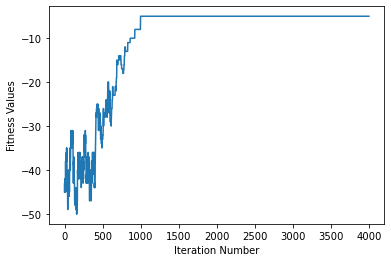

In [23]:
board = read_sudoku_problem('easy1_1.txt')
board.pretty_print()
run_simulated_annealing(board,initial_temperature=20, num_trials=4000, cooling_schedule=(200,0.3))

|---------+---------+---------|
| 8  4  6 | 6  2  4 | 1  1  5 |
| 4  3  5 | 3  7  1 | 2  6  8 |
| 4  5  1 | 5  3  3 | 9  7  3 |
|---------+---------+---------|
| 6  9  3 | 9  3  8 | 1  9  7 |
| 5  7  2 | 1  3  7 | 4  8  7 |
| 1  2  8 | 2  4  2 | 3  5  6 |
|---------+---------+---------|
| 4  7  5 | 3  1  2 | 2  5  3 |
| 2  2  9 | 3  5  7 | 6  4  1 |
| 3  7  5 | 4  8  4 | 5  2  9 |
|---------+---------+---------|
@Iter 0 - Best so far: -55.000000
@Iter 141 - Best so far: -54.000000
@Iter 154 - Best so far: -53.000000
@Iter 158 - Best so far: -51.000000
@Iter 200 cooling to 6.000000
@Iter 400 cooling to 1.800000
@Iter 530 - Best so far: -50.000000
@Iter 534 - Best so far: -48.000000
@Iter 535 - Best so far: -47.000000
@Iter 545 - Best so far: -46.000000
@Iter 553 - Best so far: -44.000000
@Iter 559 - Best so far: -43.000000
@Iter 600 cooling to 0.540000
@Iter 616 - Best so far: -42.000000
@Iter 635 - Best so far: -40.000000
@Iter 637 - Best so far: -39.000000
@Iter 641 - Best so far: -38

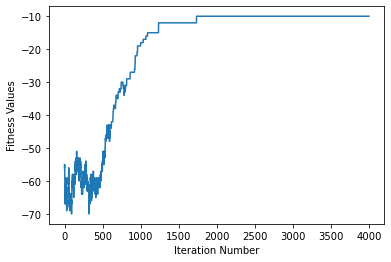

In [25]:
board = read_sudoku_problem('easy1_2.txt')
board.pretty_print()
run_simulated_annealing(board,initial_temperature=20, num_trials=4000, cooling_schedule=(200,0.3))

|---------+---------+---------|
| 4  8  8 | 3  4  9 | 6  6  4 |
| 7  6  2 | 1  1  9 | 3  4  8 |
| 6  5  5 | 1  8  3 | 7  1  4 |
|---------+---------+---------|
| 5  1  7 | 1  2  3 | 8  4  9 |
| 6  3  4 | 6  3  1 | 5  7  1 |
| 3  1  9 | 5  4  3 | 2  7  6 |
|---------+---------+---------|
| 8  4  3 | 8  5  8 | 9  8  7 |
| 2  6  7 | 3  6  4 | 1  7  3 |
| 9  4  6 | 1  7  7 | 4  5  3 |
|---------+---------+---------|
@Iter 0 - Best so far: -61.000000
@Iter 81 - Best so far: -59.000000
@Iter 87 - Best so far: -57.000000
@Iter 200 cooling to 6.000000
@Iter 363 - Best so far: -56.000000
@Iter 393 - Best so far: -54.000000
@Iter 395 - Best so far: -52.000000
@Iter 400 cooling to 1.800000
@Iter 451 - Best so far: -51.000000
@Iter 455 - Best so far: -50.000000
@Iter 456 - Best so far: -49.000000
@Iter 600 cooling to 0.540000
@Iter 626 - Best so far: -48.000000
@Iter 628 - Best so far: -47.000000
@Iter 630 - Best so far: -46.000000
@Iter 643 - Best so far: -44.000000
@Iter 659 - Best so far: -43.0

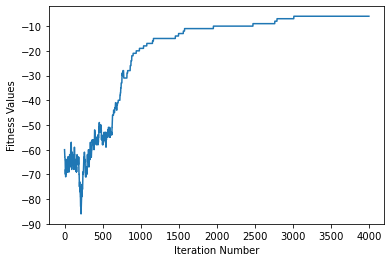

In [26]:
board = read_sudoku_problem('easy1_3.txt')
board.pretty_print()
run_simulated_annealing(board,initial_temperature=20, num_trials=4000, cooling_schedule=(200,.3))

|---------+---------+---------|
| 2  5  6 | 8  1  5 | 7  4  9 |
| 8  3  7 | 8  4  9 | 1  1  2 |
| 1  8  8 | 7  2  8 | 3  2  6 |
|---------+---------+---------|
| 6  6  1 | 5  8  3 | 9  7  3 |
| 7  6  5 | 9  3  3 | 8  3  4 |
| 8  4  9 | 1  6  2 | 1  3  3 |
|---------+---------+---------|
| 9  5  3 | 6  7  4 | 3  7  1 |
| 8  8  8 | 3  1  7 | 4  9  7 |
| 4  1  3 | 6  5  5 | 2  3  8 |
|---------+---------+---------|
@Iter 0 - Best so far: -55.000000
@Iter 1 - Best so far: -53.000000
@Iter 4 - Best so far: -51.000000
@Iter 5 - Best so far: -50.000000
@Iter 6 - Best so far: -49.000000
@Iter 7 - Best so far: -47.000000
@Iter 12 - Best so far: -45.000000
@Iter 13 - Best so far: -44.000000
@Iter 14 - Best so far: -42.000000
@Iter 15 - Best so far: -41.000000
@Iter 34 - Best so far: -40.000000
@Iter 35 - Best so far: -39.000000
@Iter 75 cooling to 6.000000
@Iter 150 cooling to 1.800000
@Iter 193 - Best so far: -38.000000
@Iter 197 - Best so far: -37.000000
@Iter 200 - Best so far: -36.000000
@It

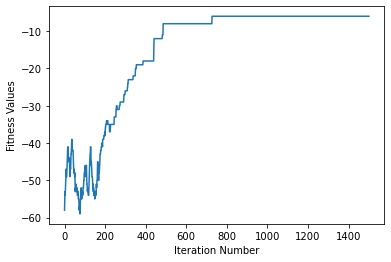

In [27]:
board = read_sudoku_problem('easy1_4.txt')
board.pretty_print()
run_simulated_annealing(board,initial_temperature=20, num_trials=1500, cooling_schedule=(75,0.3))

|---------+---------+---------|
| 6  2  5 | 3  1  7 | 3  9  4 |
| 9  8  1 | 9  8  5 | 3  2  3 |
| 7  8  6 | 6  2  8 | 5  6  1 |
|---------+---------+---------|
| 5  3  9 | 7  1  4 | 8  7  3 |
| 1  6  4 | 3  1  9 | 4  4  7 |
| 1  8  7 | 5  3  2 | 6  4  9 |
|---------+---------+---------|
| 9  1  3 | 4  7  8 | 2  8  6 |
| 9  4  6 | 1  6  8 | 7  5  5 |
| 8  6  6 | 2  3  3 | 9  1  5 |
|---------+---------+---------|
@Iter 0 - Best so far: -53.000000
@Iter 2 - Best so far: -51.000000
@Iter 87 - Best so far: -50.000000
@Iter 95 - Best so far: -49.000000
@Iter 188 - Best so far: -48.000000
@Iter 189 - Best so far: -46.000000
@Iter 200 cooling to 6.000000
@Iter 236 - Best so far: -45.000000
@Iter 342 - Best so far: -44.000000
@Iter 400 cooling to 1.800000
@Iter 417 - Best so far: -43.000000
@Iter 418 - Best so far: -42.000000
@Iter 419 - Best so far: -41.000000
@Iter 420 - Best so far: -40.000000
@Iter 438 - Best so far: -39.000000
@Iter 459 - Best so far: -38.000000
@Iter 461 - Best so far: -

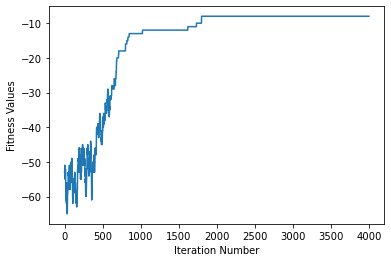

In [28]:
board = read_sudoku_problem('easy1_5.txt')
board.pretty_print()
run_simulated_annealing(board,initial_temperature=20, num_trials=4000, cooling_schedule=(200,0.3))